# <span style = 'color:purple'> Finding Heavy Traffic Indicators on I-94 </span>


* I'm going to analyze the westbound traffic on the I-94 Interstate highway. It is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States.
<div>
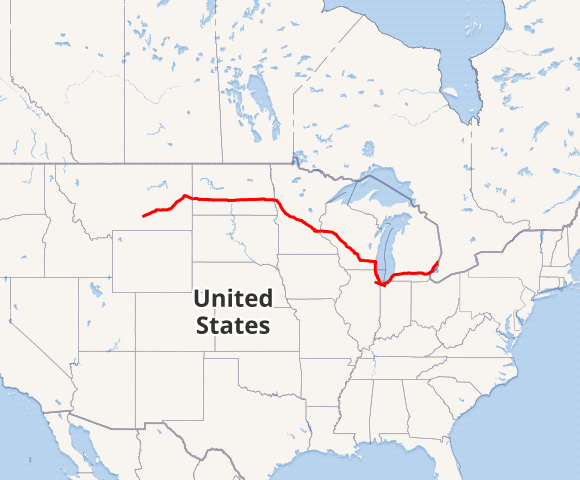
</div>




* John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

* The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

* The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data.

* The station only records westbound traffic (cars moving from east to west)

* The results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

In [1]:
import pandas as pd

i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()



,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [3]:
i_94['holiday'].describe()

count     48204
unique       12
top        None
freq      48143
Name: holiday, dtype: object

### <span style = 'color:green'> Obs 1: The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.</span>

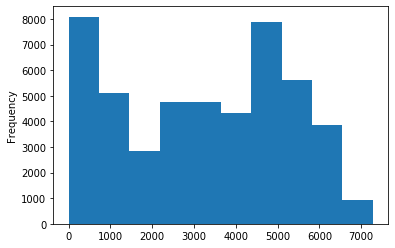

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94['traffic_volume'].plot.hist()
plt.show()

In [5]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### <span style = 'color:green'> Obs 2: About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. </span>
###  <span style = 'color:green'> About 25% of the time, the traffic volume was four times as much (4,933 cars or more) </span>

## <span style = 'color:red'>Q : Does daytime and nighttime influence the traffic volume? </span>

### <span style = 'color:brown'> Step 1: We'll start by dividing the dataset into two parts:</span>

<span style = 'color:brown'> Daytime data: hours from 7 AM to 7 PM (12 hours)</span>

<span style = 'color:brown'> Nighttime data: hours from 7 PM to 7 AM (12 hours)</span>


In [6]:
type(i_94['date_time'][0])

str

In [7]:
i_94['date_time']=pd.to_datetime(i_94['date_time'])

In [8]:
hour_extract = i_94['date_time'].dt.hour

In [9]:
hour_extract.unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  8,  7], dtype=int64)

In [10]:
daytime = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(daytime.shape)

(23877, 9)


In [11]:
nighttime = i_94.copy()[~((i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19))]
print(nighttime.shape)

(24327, 9)


### <span style = 'color:brown'>Step 2: Plot the histograms of traffic_volume for both day and night </span>


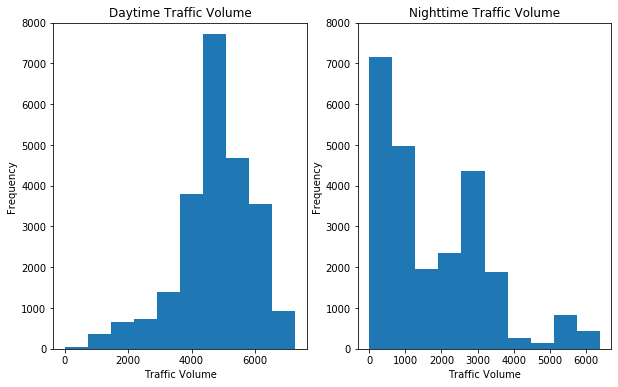

In [12]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'])
plt.title('Daytime Traffic Volume')
plt.ylim([0,8000])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')


plt.subplot(1,2,2)
plt.hist(nighttime['traffic_volume'])
plt.title('Nighttime Traffic Volume')
plt.ylim([0,8000])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

In [13]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [14]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### <span style = 'color:green'> Obs 2:The daytime histogram is left-skewed with higher traffic volumes occuring more often during this period. </span>
### <span style = 'color:green'>* The nighttime histogram is right-skewed with lower traffic volumes occurring more often - 75% of the time, the number of cars that passed the station each hour was less than 2,819.</span>
### <span style = 'color:green'>* Since nighttime data reflects lower traffic volumes, it will not be as useful to find indicators of heavy traffic which is significantly more common during the day.</span>
### <span style = 'color:green'>* Moving forward we'll focus on the daytime data</span>

## <span style = 'color:red'> Daytime Traffic Volume : Month Influence </span>

### <span style = 'color:brown'> Step 1: Append new column month:</span>

### <span style = 'color:brown'>Use Group by to generate statistics by month</span>


In [15]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
print(by_month['traffic_volume'])

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64


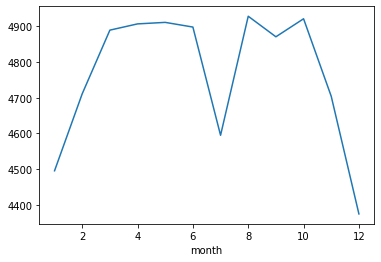

In [16]:
by_month['traffic_volume'].plot.line()
plt.show()

### <span style = 'color:green'> Obs 3:The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. </span>
### <span style = 'color:green'>We need to find the answer--- Is there anything special about July? Is traffic significantly less heavy in July each year?</span>

### <span style = 'color:brown'> Step 2: Analyze for July by year:</span>

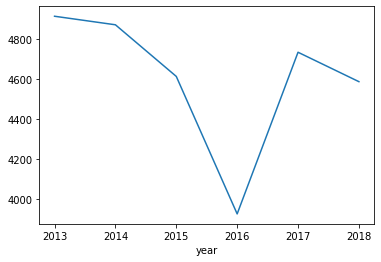

In [17]:
daytime['year'] = daytime['date_time'].dt.year
only_july = daytime[daytime['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()



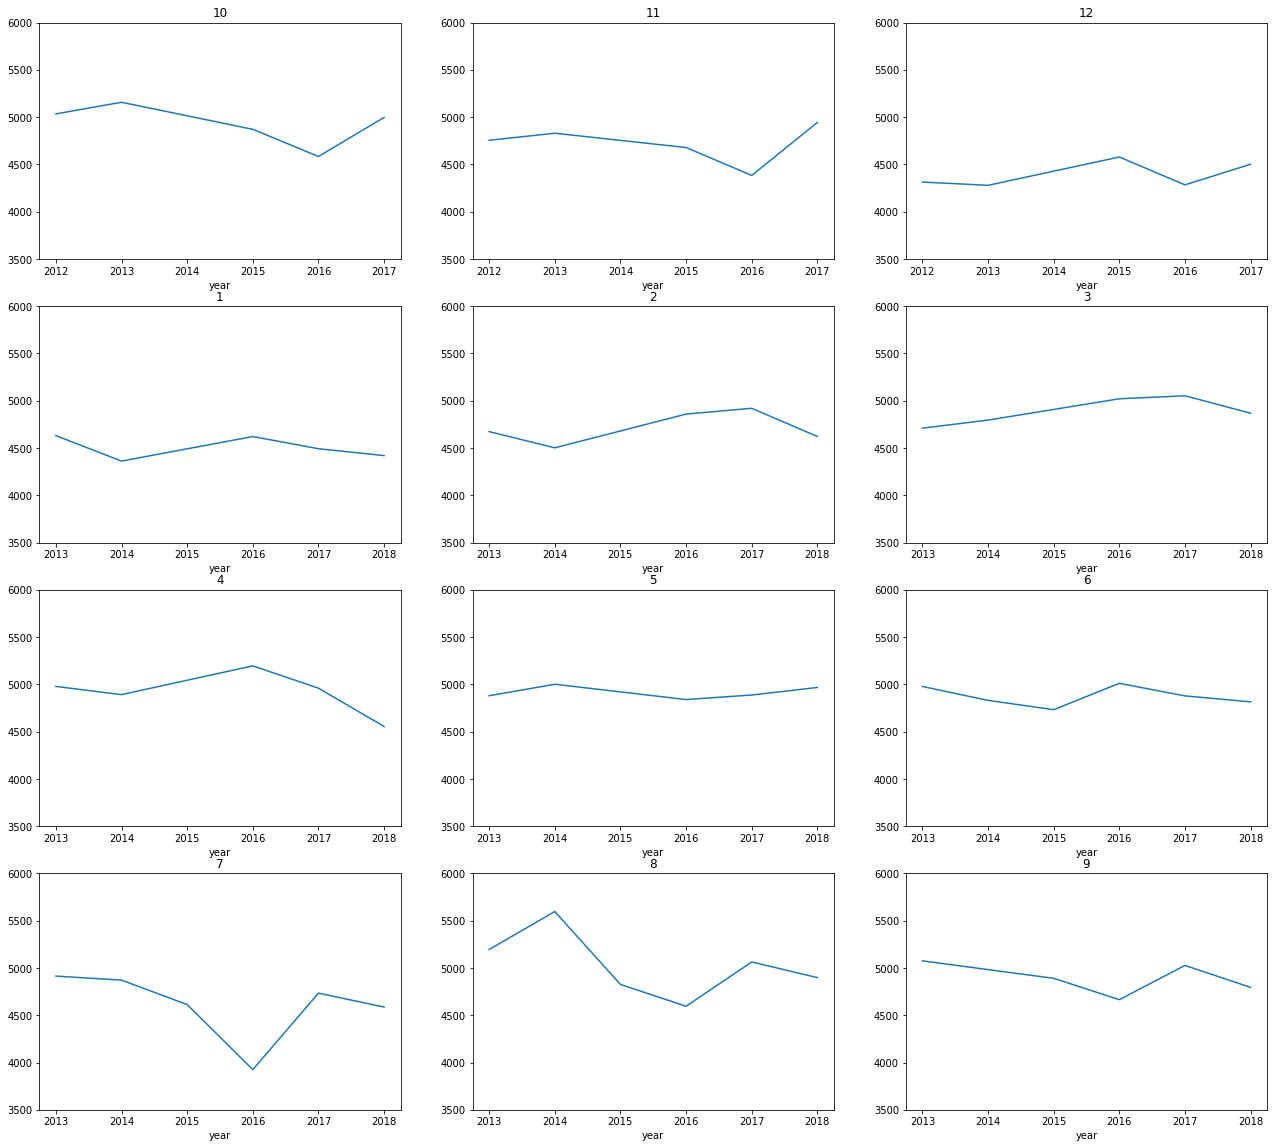

In [28]:
months = daytime['month'].unique()
plt.figure(figsize=(22,20))
for i,m in zip(range(1,13),months):
    plt.subplot(4,3,i)
    daytime[daytime['month'] == m].groupby('year').mean()['traffic_volume'].plot.line()
    plt.title(m)
    plt.ylim([3500,6000])
plt.show()
    

### <span style = 'color:green'> Obs 5: Typically, the traffic is pretty heavy in July(no. of cars passing more than 4500) , similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) from 2016 supports this hypothesis.</span>
### <span style = 'color:green'>As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.</span>

## <span style = 'color:red'> Daytime Traffic Volume : Day of Week Influence </span>

### <span style = 'color:brown'> Steps: Append new column month , use Group by to generate statistics by day of week</span>

### <span style = 'color:brown'></span>


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64


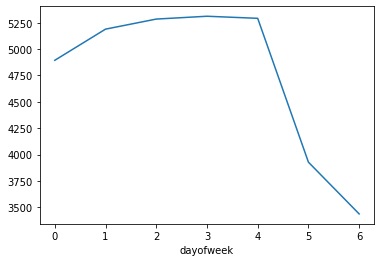

In [19]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
print(by_dayofweek['traffic_volume'])
by_dayofweek['traffic_volume'].plot.line()
plt.show()# 0 is Monday, 6 is Sunday

### <span style = 'color:green'>Obs 6 :Traffic is lighter on weekends(5 = Saturday , 6 = Sunday), with values below 4,000 cars and heavier on business days with traffic volume more than 5,000 cars except Monday.</span>

## <span style = 'color:red'> Business Days vs. Weekends : Visualize Hourly Traffic Volume </span>

### <span style = 'color:brown'> Step 1: We'll start by dividing the daytime dataset into two parts: weekend and weekday and then plotting line plots to compare hourly influence</span>


In [20]:
daytime['hour'] = daytime['date_time'].dt.hour
weekday = daytime.copy()[(daytime['dayofweek'] >= 0) & (daytime['dayofweek'] <= 4)]
weekend = daytime.copy()[~((daytime['dayofweek'] >= 0) & (daytime['dayofweek'] <= 4))]
#print(weekend['dayofweek'].unique())
by_hour_business = weekday.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

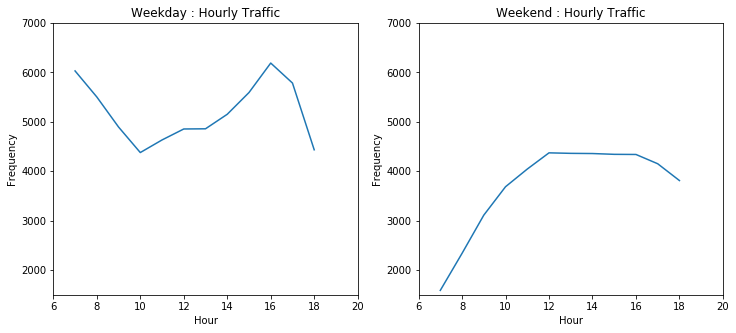

In [21]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Weekday : Hourly Traffic')
plt.ylim([1500,7000])
plt.xlim([6,20])
plt.xlabel('Hour')
plt.ylabel('Frequency')


plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend : Hourly Traffic')
plt.ylim([1500,7000])
plt.xlim([6,20])
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

### <span style = 'color:green'>Obs 7 : At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours. </span>
    
### <span style = 'color:green'> During weekends ,traffic volume early in the morning is low, climbing steadily until noon when it stabilizes at a medium level for the rest of the afternoon.</span>

## <span style = 'color:red'> Analyzing Weather indicators: Numerical columns via Correlation </span>

#### <span style = 'color:brown'>Steps : The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.We need to find the correlation values between traffic_volume and the numerical weather columns</span>

In [22]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64


### <span style = 'color:green'>Obs 8: Temperature shows to have slighly more influence than precipitation or cloud cover and shows the strongest correlation with a value of just +0.13</span>


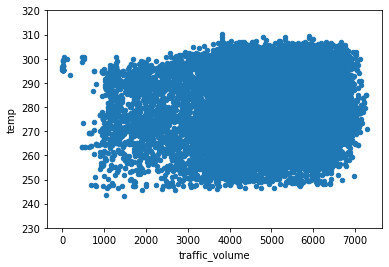

In [23]:
daytime.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) 
plt.show()


### <span style = 'color:green'>Obs 9:Temperature is not a reliable indicator . The scatter plot appears as a block indicating nothing of significance </span>


## <span style = 'color:red'> Analyzing Weather indicators: Categorical columns </span>

#### <span style = 'color:brown'> To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description </span>

                    temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
weather_main                                                               
Clear         283.812078  0.000000  0.000000    1.670265     4778.416260   
Clouds        282.929274  0.000000  0.000000   62.667548     4865.415996   
Drizzle       284.456433  0.170804  0.000000   84.704417     4837.212911   
Fog           277.579641  0.163840  0.001409   65.477901     4372.491713   
Haze          275.319353  0.040036  0.000000   64.000000     4609.893285   
Mist          279.420825  0.249992  0.000825   74.961435     4623.976475   
Rain          287.089601  3.972943  0.000292   75.870116     4815.568462   
Smoke         292.405833  0.878333  0.000000   53.333333     4564.583333   
Snow          267.984505  0.014017  0.001768   80.501376     4396.321183   
Squall        296.730000  1.020000  0.000000   75.000000     4211.000000   
Thunderstorm  293.364678  1.146475  0.000000   75.184035     4648.212860   

           

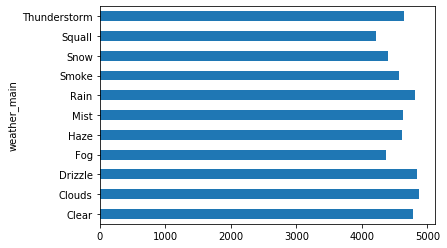

In [24]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()
print(by_weather_main)
by_weather_main['traffic_volume'].plot.barh()
plt.show()

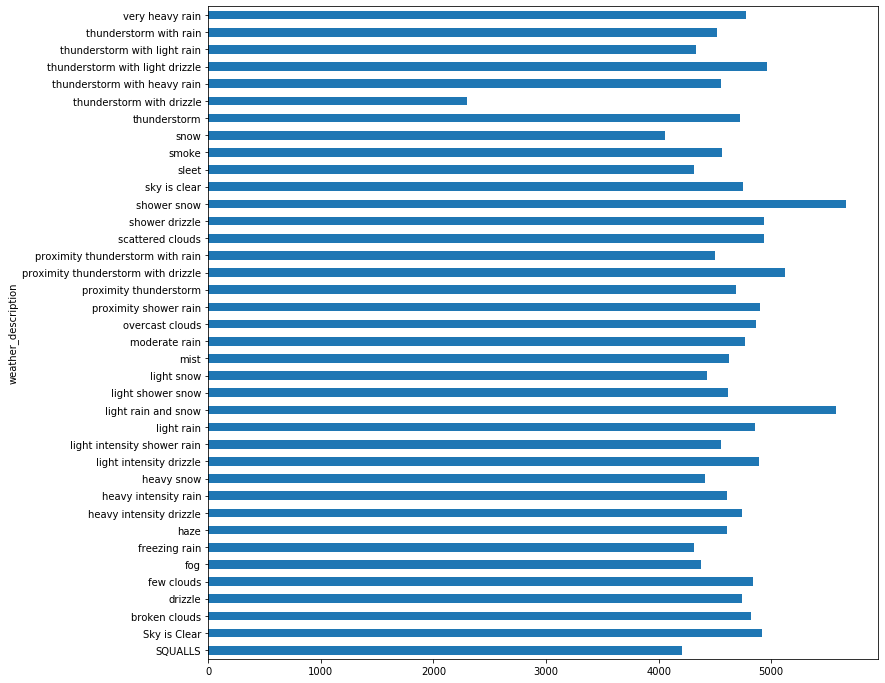

In [25]:
by_weather_description['traffic_volume'].plot.barh(figsize=(12,12))
plt.show()

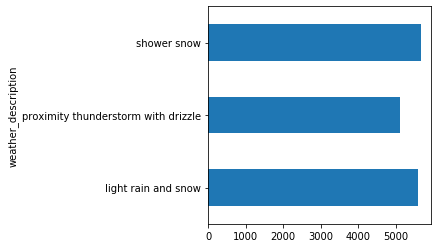

In [26]:
tbool = by_weather_description['traffic_volume'] > 5000
#plot.barh()

by_weather_description[tbool]['traffic_volume'].plot.barh(figsize=(4,4))
plt.show()


### <span style = 'color:green'>Obs 10: The Weather Description doesn't bring significant changes to the traffic volume except during Thunderstorm with Drizzle which reduces the traffic volume close to 2000 maybe because of visibility issues</span>
### <span style = 'color:green'>  However, when looking a little more closely, weather events like shower snow , proximity thunderstorm with drizzle and light rain and snow had higher traffic volumes than other events. An explanation could be icy road conditions.</span>


## <span style = 'color:purple'>Conclusion </span>

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

### Time indicators 

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to the weekends.
* On business days, the rush hours are around 7 and 16.

### Weather indicators 
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle
